In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('Uber Request Data.csv')

In [96]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [97]:
# to check the columns in the dataset
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [98]:
# to check if there are null cells in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


##### Driver id and Drop timestamp contains some null values


In [29]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [99]:
df[df.isnull().any(axis=1)]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


##### On analyzing, it can be found that its in the case where rides were cancelled or cars were unavailable.

In [100]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#### Converting timeDate columns to proper datetime format

In [278]:
ds = df.groupby('Status')

In [101]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"])

In [102]:
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"])

In [103]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [104]:
### looking for different categories in Status column
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [105]:
### looking for different categories in Pickpoint column
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

### Extracting hour stamp from Request/Drop columns

In [109]:
df['Time_hour_req'] = df['Request timestamp'].dt.hour
df['Time_hour_drop'] = df['Drop timestamp'].dt.hour
df['year'] = df['Request timestamp'].dt.year

In [110]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time_hour_req,Time_hour_drop,year
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,13.0,2016
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,18.0,2016
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,9.0,2016
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,22.0,2016
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,2016


In [111]:
## Checking data types
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Time_hour_req                 int64
Time_hour_drop              float64
year                          int64
dtype: object

In [64]:
df['year'].unique()

array([2016], dtype=int64)

In [120]:
del df["year"]

In [121]:
## data types
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Time_hour_req                 int64
Time_hour_drop              float64
dtype: object

In [122]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time_hour_req,Time_hour_drop
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0


In [128]:
## deleting the column.
del df["Request timestamp"]


In [129]:
df.head()


,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0


#### Grouping based on Pickup point and Status.

In [242]:

grp = df.groupby(['Pickup point', 'Status']).size().unstack(fill_value=0)
grp

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


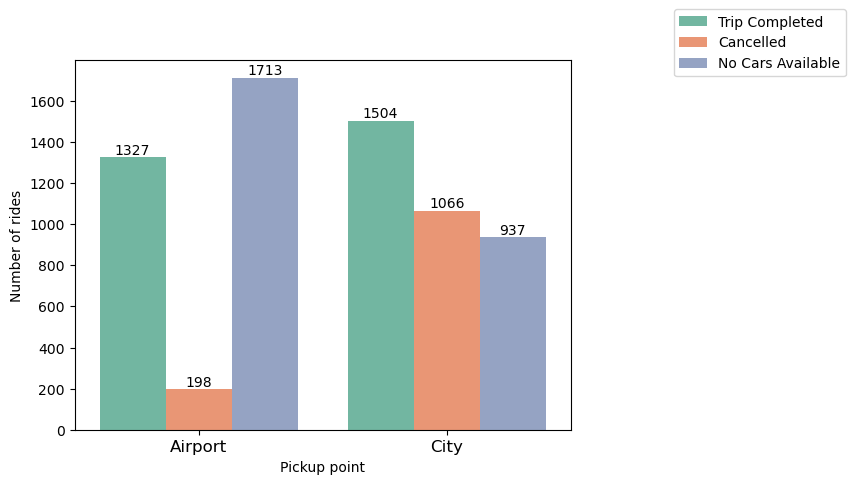

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.countplot(x = 'Pickup point', hue = 'Status', data=df, palette='Set2')
# labels = ["1st Month", "2nd Month", "3rd Month"]
for bars in fig.containers:
    fig.bar_label(bars)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', bbox_transform=plt.gcf().transFigure)
# fig.legend(labels) 
plt.xticks(rotation='horizontal', size=12)        
# plt.yticks(range(0,160, 10))
plt.ylabel('Number of rides')
plt.xlabel('Pickup point')
plt.show()    

#### most of the times when rides from airport was called cars were not available
#### trips from city were found to be mostly completed.
#### rate of cancellation is more from city han from airport, while rate of completion is more from city than airport

#### Subset of data for rides completed

In [155]:
trip_compl = df[df['Status']=='Trip Completed']
trip_compl

,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0
...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,22,23.0
2827,2924,City,300.0,Trip Completed,6,7.0
2828,3324,Airport,300.0,Trip Completed,12,13.0
2829,3935,Airport,300.0,Trip Completed,22,23.0


Text(0, 0.5, 'No of rides')

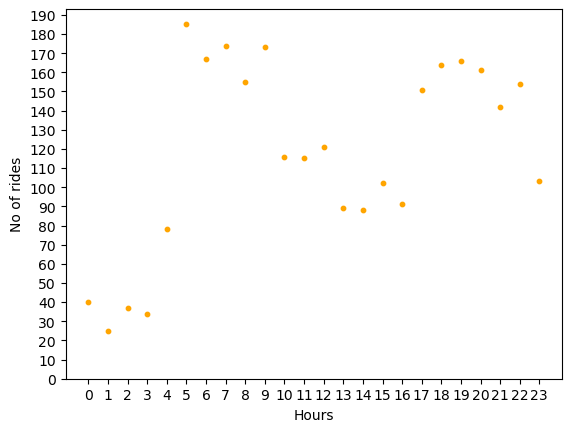

In [301]:
plt.scatter(trip_compl['Time_hour_req'].value_counts().index, trip_compl['Time_hour_req'].value_counts(), s = 10, c = 'orange')
plt.xticks(trip_compl['Time_hour_req'].value_counts().index)
plt.yticks(range(0,200,10))
plt.xlabel('Hours')
plt.ylabel('No of rides')

#### most of the car requests are made from 5-9 am and also 5-8 pm

In [144]:
trip_compl['Time_hour_req'].value_counts()

5     185
7     174
9     173
6     167
19    166
18    164
20    161
8     155
22    154
17    151
21    142
12    121
10    116
11    115
23    103
15    102
16     91
13     89
14     88
4      78
0      40
2      37
3      34
1      25
Name: Time_hour_req, dtype: int64

In [146]:
df.tail()

,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop
6740,6745,City,NaN,No Cars Available,23,NaN
6741,6752,Airport,NaN,No Cars Available,23,NaN
6742,6751,City,NaN,No Cars Available,23,NaN
6743,6754,City,NaN,No Cars Available,23,NaN
6744,6753,Airport,NaN,No Cars Available,23,NaN


In [160]:
no_cars = df[df['Status']=='No Cars Available']

In [161]:
no_cars

,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop
4095,1362,City,NaN,No Cars Available,0,NaN
4096,1364,City,NaN,No Cars Available,0,NaN
4097,1366,City,NaN,No Cars Available,0,NaN
4098,2,Airport,NaN,No Cars Available,0,NaN
4099,7,Airport,NaN,No Cars Available,0,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,NaN
6741,6752,Airport,NaN,No Cars Available,23,NaN
6742,6751,City,NaN,No Cars Available,23,NaN
6743,6754,City,NaN,No Cars Available,23,NaN


([<matplotlib.axis.XTick at 0x1a8fc9e2a90>,
 [Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(19, 0, '19'),
  Text(21, 0, '21'),
  Text(17, 0, '17'),
  Text(22, 0, '22'),
  Text(8, 0, '8'),
  Text(6, 0, '6'),
  Text(5, 0, '5'),
  Text(9, 0, '9'),
  Text(23, 0, '23'),
  Text(4, 0, '4'),
  Text(10, 0, '10'),
  Text(7, 0, '7'),
  Text(2, 0, '2'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(12, 0, '12'),
  Text(11, 0, '11'),
  Text(14, 0, '14')])

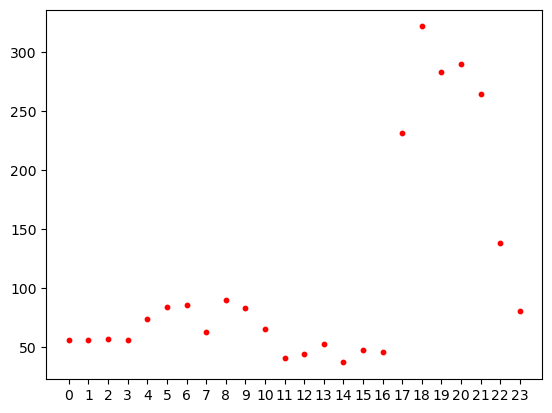

In [163]:
plt.scatter(no_cars['Time_hour_req'].value_counts().index, no_cars['Time_hour_req'].value_counts(), s = 10, c = 'red')
plt.xticks(no_cars['Time_hour_req'].value_counts().index)
# plt.yticks(range(0,200,10))

#### it is found that most of the times cars were unavailable at night after 9:00 pm

In [257]:
dn = df[ (df['Status'] == 'No Cars Available')]
dn
#(df['Status'] == 'Trip Completed') |

,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop
4095,1362,City,NaN,No Cars Available,0,NaN
4096,1364,City,NaN,No Cars Available,0,NaN
4097,1366,City,NaN,No Cars Available,0,NaN
4098,2,Airport,NaN,No Cars Available,0,NaN
4099,7,Airport,NaN,No Cars Available,0,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,NaN
6741,6752,Airport,NaN,No Cars Available,23,NaN
6742,6751,City,NaN,No Cars Available,23,NaN
6743,6754,City,NaN,No Cars Available,23,NaN


Text(0, 0.5, 'No. of rides')

<Figure size 1500x800 with 0 Axes>

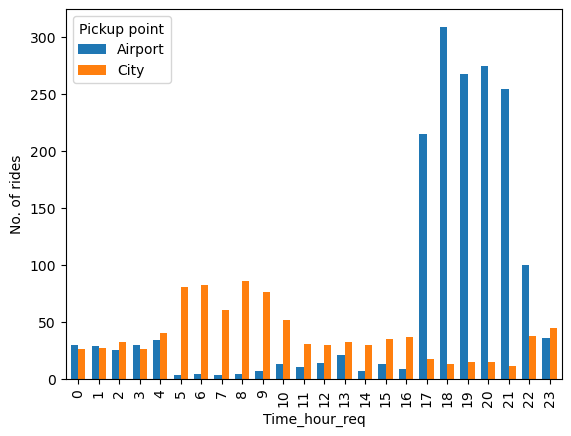

In [258]:
plt.figure(figsize=(15,8))
gr = dn.groupby(['Time_hour_req','Pickup point']).size().unstack(fill_value=0)
gr
gr.plot(kind='bar', width = 0.7) 
plt.ylabel('No. of rides')

#### unavailibility of cars at airport is more from 5:00pm to 10:00pm.
#### unavailibility of cars at city is more from 5:00am to 10:00am.

In [259]:
da = df[ (df['Status'] == 'Trip Completed')]
da

,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0
...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,22,23.0
2827,2924,City,300.0,Trip Completed,6,7.0
2828,3324,Airport,300.0,Trip Completed,12,13.0
2829,3935,Airport,300.0,Trip Completed,22,23.0


Text(0, 0.5, 'No. of rides')

<Figure size 2000x1500 with 0 Axes>

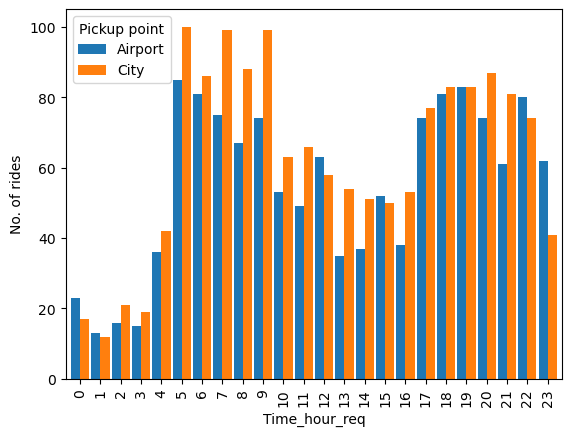

In [304]:
plt.figure(figsize=(20,15))
gr = da.groupby([ 'Time_hour_req','Pickup point']).size().unstack(fill_value=0)
gr
gr.plot(kind='bar', width = 0.9) 
plt.ylabel('No. of rides')

In [164]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [165]:
cancelled =  df[df['Status']=='Cancelled']

In [166]:
cancelled.shape

(1264, 6)

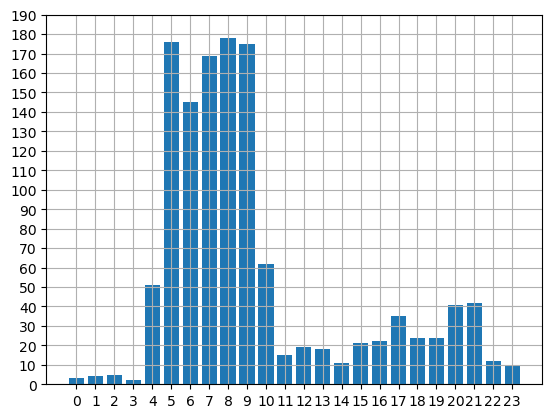

In [253]:
plt.bar(cancelled['Time_hour_req'].value_counts().index, cancelled['Time_hour_req'].value_counts())
plt.xticks(cancelled['Time_hour_req'].value_counts().index)
plt.yticks(range(0,200,10))
plt.grid()

#### most of the rides are cancelled from 4:00am to 9:00 am

In [178]:
df['Driver id'].nunique()

300

In [177]:
## checking if driver id is null when status was cancelled
df[df['Driver id'].isnull() & df['Status']=='Cancelled']

,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop


In [183]:
df[df['Driver id'].isnull()].nunique()

Request id        2650
Pickup point         2
Driver id            0
Status               1
Time_hour_req       24
Time_hour_drop       0
dtype: int64

In [198]:
dd = df[(df['Status'] == 'Trip Completed') | (df['Status'] == 'No Cars Available')]
dd


,Request id,Pickup point,Driver id,Status,Time_hour_req,Time_hour_drop
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,NaN
6741,6752,Airport,NaN,No Cars Available,23,NaN
6742,6751,City,NaN,No Cars Available,23,NaN
6743,6754,City,NaN,No Cars Available,23,NaN


### Drivers Status

#### Based on no.of cancellations and trip completed by each driver

In [210]:
grouped = df.groupby(['Driver id', 'Status']).size().unstack(fill_value=0)
grouped

Status,Cancelled,Trip Completed
Driver id,,
1.0,4,9
2.0,4,9
3.0,4,10
4.0,5,10
5.0,2,11
...,...,...
296.0,4,10
297.0,4,11
298.0,4,11


In [212]:
grouped.max()

Status
Cancelled         12
Trip Completed    16
dtype: int64

In [227]:
mx1 = grouped[grouped['Cancelled']==12]


In [228]:
mx2 = grouped[grouped['Trip Completed']==16]


### The driver who had most cancellation and most completed trip

In [229]:
max_canc_comp = pd.concat([mx1, mx2])
max_canc_comp

Status,Cancelled,Trip Completed
Driver id,,
84.0,12,9
22.0,5,16


In [230]:
grouped.min()

Status
Cancelled         0
Trip Completed    4
dtype: int64

In [231]:
mn1 = grouped[grouped['Cancelled']==0]
mn2 = grouped[grouped['Trip Completed']==4]

### The driver who had least cancellation and least completed trip

In [232]:
min_canc_comp = pd.concat([mn1, mn2])
min_canc_comp

Status,Cancelled,Trip Completed
Driver id,,
11.0,0,8
12.0,0,12
42.0,0,7
55.0,0,10
75.0,0,11
117.0,4,4


In [286]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

([<matplotlib.patches.Wedge at 0x1a88f2e9790>,
 [Text(-0.27450168572516825, -1.065198960069921, 'Trip Completed'),
  Text(0.8197978372292607, 0.7334381405914385, 'Cancelled'),
  Text(-0.9148122117335422, 0.6108343615606321, 'No Cars Available')],
 [Text(-0.14972819221372813, -0.5810176145835932, '42.0%'),
  Text(0.4471624566705058, 0.4000571675953301, '39.3%'),
  Text(-0.4989884791273866, 0.333182379033072, '18.7%')])

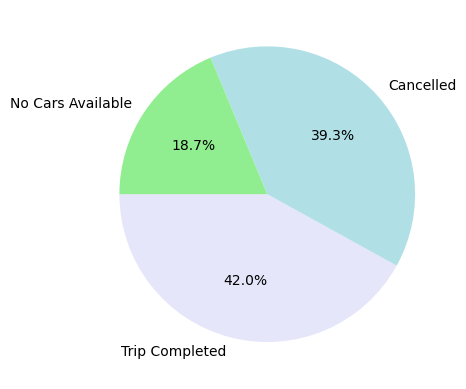

In [300]:
labels = ['Trip Completed', 'Cancelled', 'No Cars Available']

plt.pie(df['Status'].value_counts(), labels = labels, autopct='%1.1f%%', startangle=180, colors = ['lavender', 'powderblue', 'lightgreen'])

In [238]:
grouped[grouped['Cancelled']==grouped['Trip Completed']].index

Float64Index([39.0, 83.0, 93.0, 117.0, 142.0, 164.0, 165.0, 169.0, 240.0,
              277.0, 280.0, 295.0],
             dtype='float64', name='Driver id')

In [240]:
canc_trip = grouped[grouped['Cancelled']==grouped['Trip Completed']]

In [276]:
canc_trip

Status,Cancelled,Trip Completed
Driver id,,
39.0,6,6
83.0,7,7
93.0,5,5
117.0,4,4
142.0,10,10
164.0,8,8
165.0,6,6
169.0,5,5
240.0,6,6
